# 모델 평가
- 모델의 성능 평가는 모델링 중 현재 모델의 성능을 확인하는 검증 단계와 최종 성능 평가에서 진행한다.
- 어떤 문제를 해결하는 가와 모델의 어떤 측면의 성능을 확인하는 가에 따라 다양한 평가 방법이 있다. 

# 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)


https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

##  이진 분류(Binary classification)
- **특정 클래스인지 아닌지를 분류한다.**
    - 환자인가?
    - 스팸메일인가? 
    - 사기 거래 인가?
- 이진 분류 양성(Positive)과 음성(Negative)
    - **양성(Positive):** 찾으려는 대상이 True이인 것. 보통 1로 표현한다.
    - **음성(Negative):** 찾으려는 대상이 False이인 것. 보통 0로 표현한다.
- 예
    - 환자인가? (검사기록을 통해 환자를 찾으려는 경우)
        - 양성(Positive): 환자, 1
        - 음성(Negative): 환자 아님(정상), 0
    - 스팸메일인가? (메일의 내용을 바탕으로 스팸메일을 찾으려는 경우.)
         - 양성(Positive): 스팸메일, 1
         - 음성(Negative): 스팸메일 아님(정상 메일), 0
    - 사기 거래 인가? (금융거래 기록을 바탕으로 금융사기 거래를 찾으려는 경우.)
         - 양성(Positive): 사기 거래, 1
         - 음성(Negative): 사기 거래 아님(정상 거래), 0
        

## 정확도 (Accuracy)
- **분류문제의 대표 평가 지표**


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 한계
- 추론한 전체 데이터를 기준으로 평가한다. 그래서 클래스별 성능 평가가 안된다.
- 예를 들어 이진 분류에서 **양성(Positive) 또는 음성(Negative)에 대한 지표를 따로 확인 할 수없다.** 
    - 전체 중 몇 개가 맞았는지에 대한 평가 지표이므로 양성(Positive)만의 성능 또는 음성(Negative)만의 성능을 알 수 없다.
    - 특히 불균형 데이터의 경우 정확도 만으로 정확한 성능평가가 어렵다.
        - 만약 양성과 음성의 비율이 1:9 인 데이터를 모델이 모두 음성이라고 예측해도 정확도는 90%가 된다. 양성은 아예 맞추지 못하는 모델임에도 정확도만 보면 괜찮은 성능으로 볼 수있다. 

> ## MNIST Data set
> - 손글씨 숫자 데이터 셋
>     - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
> - 사이킷런 제공 image size: 8 X 8 
>     - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
> - https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape, X.dtype

((1797, 64), (1797,), dtype('float64'))

In [2]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [3]:
# y의 클래스(고유값), 개수 조회
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [7]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
# X(image)를 2차원(image 형태)로 reshape
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

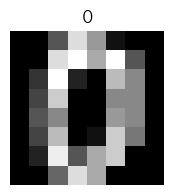

In [5]:
# image 확인
img_index = 0  # 확인할 image index
plt.figure(figsize=(2, 2))
img = X[img_index].reshape(8, 8)
plt.imshow(img, cmap='gray')  # imshow(): image 출력 함수. cmap="gray": grayscale color map으로 최소값: black ~ 최대값: white 로 출력.
plt.title(y[img_index])
plt.axis('off')     # x,y 축 눈금 제거
plt.show()

In [8]:
# 실체 크기 확인 (Python Image Libraray)
from PIL import Image

pill_img = Image.fromarray(img)
pill_img.show()

### 불균형 데이터셋으로 만들기
- 숫자 이미지를 입력으로 받아 0 ~ 9 로 분류하는 문제를 위한 데이터셋을 9와 나머지 숫자로 분류하는 데이터셋으로 변환한다.
    - 이미지의 숫자가 9인지를 물어보는 이진분류(binary classfication) 문제로 변환.
    - 이진분류의 Label은 `0`과 `1` 로 0이 Negative, 1이 Positive 값으로 사용된다.
- Positive(찾으려는 대상 - 1): 9
- Negative(찾으려는 대상이 아닌 것 - 0): 0 ~ 8

In [9]:
y = np.where(y==9, 1, 0)    # 9:1 정도의 비율

In [10]:
v = np.unique(y, return_counts=True)
print(v)
print(v[1]/y.size)

(array([0, 1]), array([1617,  180]))
[0.89983306 0.10016694]


In [11]:
# 모든 값을 0(다수 클래스)로 예측 하면?
y_hat = np.zeros_like(y)

In [12]:
# 정확도 평가 -> 89%의 정확도 측정
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat)

0.8998330550918197

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- **0번축:** 실제(정답) class, **1번축:** 예측 class, **cell:** 개수

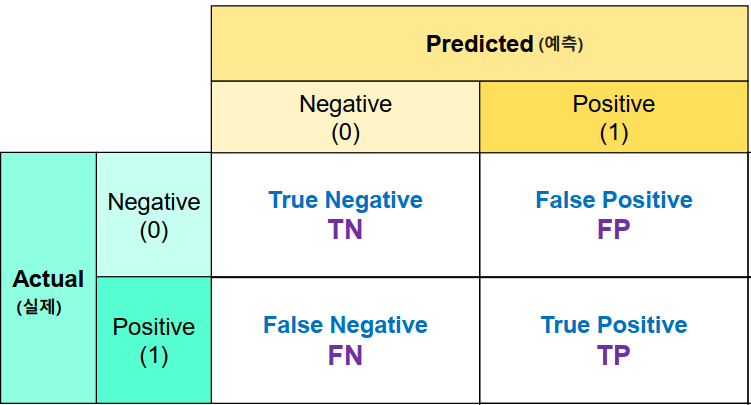

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측
- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

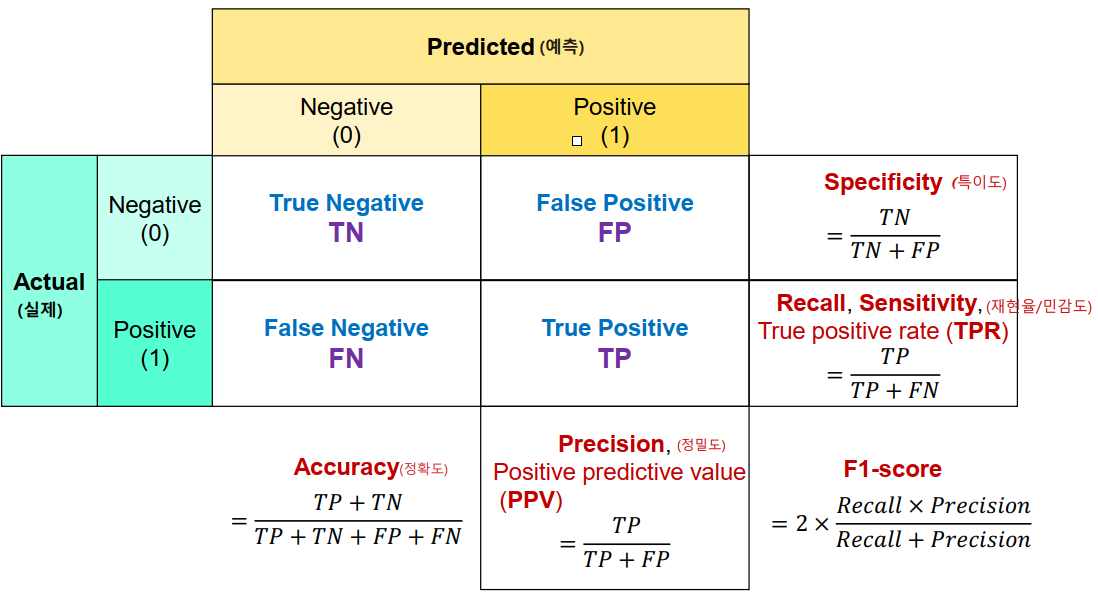

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix 시각화클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 문자열로 반환한다.
 
### 다중분류에서 recall/precsion/f1 score
- recall/precsion/f1 score 는 이진분류 평가지표 이다.
- 다중분류 평가에 사용할 경우 average 파라미터에 설정한다.
    - average="binary" (default: binary - 이진분류만 평가한다.)
        - "micro": class상관 없이 전체 클래스를 기준으로 계산한다.
        - "macro": class별로 계산한 뒤 평균을 낸다.
        - "weighted": class별로 계산한 뒤 class의 데이터 수에 따라 가중치 평균을 낸다.

In [13]:
from sklearn.metrics import (
        confusion_matrix,
        ConfusionMatrixDisplay, # confusion matrix 시각화클래스
        accuracy_score,
        recall_score, 
        precision_score,
        f1_score,
        classification_report
)
# import 시 ()를 통해 많은 Library import 가능

### 머신 모델을 이용해 학습
- DecisionTreeClassifier
- RandomForestClassifier

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [15]:
##### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(max_depth=3)

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [16]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, pred_train_tree)
cm_test =  confusion_matrix(y_test, pred_test_tree)

print(f"train set\n{cm_train}")
print("-"* 20)
print(f"test set\n{cm_test}")

train set
[[1167   45]
 [  27  108]]
--------------------
test set
[[394  11]
 [ 11  34]]


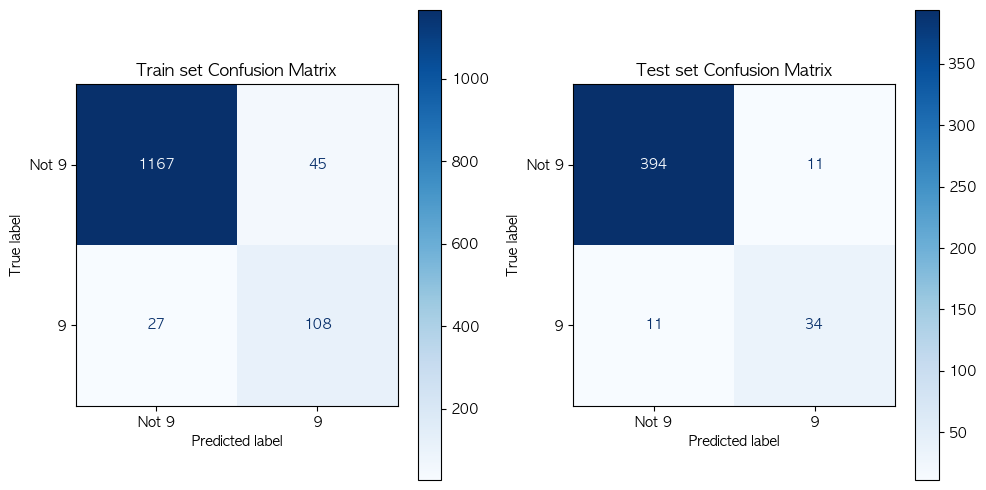

In [17]:
# 시각화 - matplotlib 를 이용해 plotting
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

disp_train = ConfusionMatrixDisplay(
    cm_train, #confusion matrix
    display_labels=['Not 9', '9']       # [음성레이블, 양성레이블]
)
disp_train.plot(cmap='Blues', ax=ax1)    # 출력

disp_test = ConfusionMatrixDisplay(
    cm_test, #confusion matrix
    display_labels=['Not 9', '9']) 
disp_test.plot(cmap='Blues', ax=ax2)

ax1.set_title("Train set Confusion Matrix")
ax2.set_title("Test set Confusion Matrix")
plt.tight_layout()
plt.show()

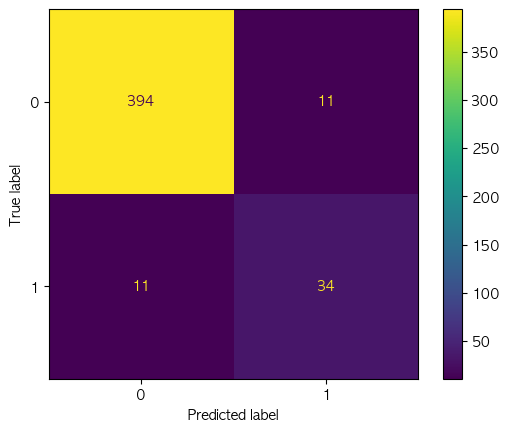

In [18]:
disp_test = ConfusionMatrixDisplay(
    cm_test, #confusion matrix
) 
disp_test.plot()

In [19]:
# 정확도
print("DecisionTree 정확도(Accuracy)")
print(f"Trainset : {accuracy_score(y_train, pred_train_tree)}, Testset: {accuracy_score(y_test, pred_test_tree)}")

DecisionTree 정확도(Accuracy)
Trainset : 0.9465478841870824, Testset: 0.9511111111111111


In [20]:
print("DecsionTree 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_tree)}, Testset: {precision_score(y_test, pred_test_tree)}")

DecsionTree 정밀도(Precision) - 1기준
Trainset : 0.7058823529411765, Testset: 0.7555555555555555


In [21]:
print("DecisionTree 재현율(Recall)")
print(f"Trainset : {recall_score(y_train, pred_train_tree)}, Testset: {recall_score(y_test, pred_test_tree)}")

DecisionTree 재현율(Recall)
Trainset : 0.8, Testset: 0.7555555555555555


In [22]:
print("DecisionTree F1 score")
print(f"Trainset : {f1_score(y_train, pred_train_tree)}, Testset: {f1_score(y_test, pred_test_tree)}")

DecisionTree F1 score
Trainset : 0.75, Testset: 0.7555555555555555


In [23]:
# 종합해서 시각화
print("---------------Train set Classification Report---------------")
print(classification_report(y_train, pred_train_tree))

---------------Train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1212
           1       0.71      0.80      0.75       135

    accuracy                           0.95      1347
   macro avg       0.84      0.88      0.86      1347
weighted avg       0.95      0.95      0.95      1347



In [26]:
print("---------------Test set Classification Report---------------")
print(classification_report(y_test, pred_test_tree))

---------------Test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       405
           1       0.76      0.76      0.76        45

    accuracy                           0.95       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.95      0.95      0.95       450



In [41]:
###### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rfc = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)

# 학습
rfc.fit(X_train, y_train)

## 추론
pred_train_rfc = rfc.predict(X_train)
pred_test_rfc =  rfc.predict(X_test)

In [42]:
# Confusion Matrix
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_train_rfc

array([[1212,    0],
       [   7,  128]])

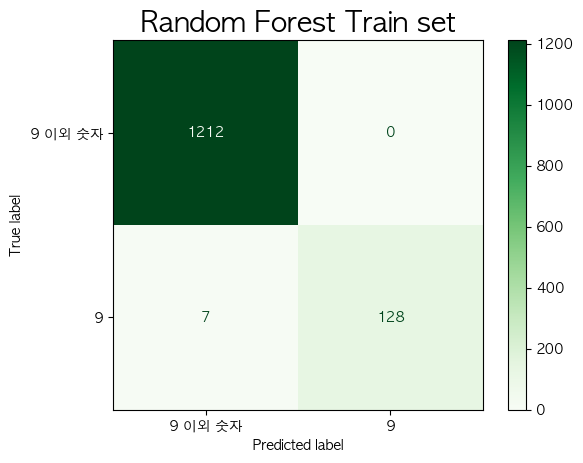

In [43]:
## Confusion Matrix Display
# 시각화 - matplotlib 를 이용해 plotting
### Trainset Confusion Matrix만 시각화.
cm_display2 = ConfusionMatrixDisplay(cm_train_rfc, display_labels=["9 이외 숫자", "9"])
cm_display2.plot(cmap="Greens")
plt.title("Random Forest Train set", fontsize=20)
plt.show()

[[405   0]
 [ 16  29]]


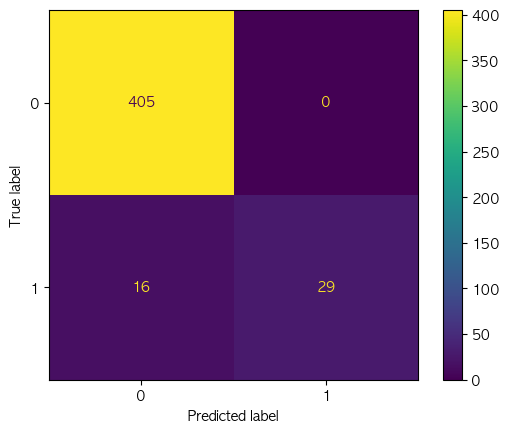

In [44]:
# TODO
# test set에서의 confusion matrix를 시각화

cm_todo =  confusion_matrix(y_test, pred_test_rfc)
print(cm_todo)

disp = ConfusionMatrixDisplay(cm_todo)
disp.plot()

In [50]:
## 정확도
from sklearn.metrics import accuracy_score
print("DecisionTree 정확도(Accuracy)")
print(f"Trainset: {accuracy_score(y_train, pred_train_rfc)}")
print(f"Testset: {accuracy_score(y_test, pred_test_rfc)}")

DecisionTree 정확도(Accuracy)
Trainset: 0.9948032665181886
Testset: 0.9644444444444444


In [49]:
## Recall(재현율)
from sklearn.metrics import recall_score
print("DecisionTree 재현율(Recall)")
print(f"Trainset: {recall_score(y_train, pred_train_rfc)}")
print(f"Testset: {recall_score(y_test, pred_test_rfc)}")

DecisionTree 재현율(Recall)
Trainset: 0.9481481481481482
Testset: 0.6444444444444445


In [48]:
## Precision(정밀도)
from sklearn.metrics import precision_score
print("DecisionTree 정밀도(Precision)")
print(f"Trainset: {precision_score(y_train, pred_train_rfc)}")
print(f"Testset: {precision_score(y_test, pred_test_rfc)}")

DecisionTree 정밀도(Precision)
Trainset: 1.0
Testset: 1.0


In [52]:
## F1 Score
from sklearn.metrics import f1_score
print("DecisionTree F1 Score")
print(f"Trainset: {f1_score(y_train, pred_train_rfc)}")
print(f"Testset: {f1_score(y_test, pred_test_rfc)}")

DecisionTree F1 Score
Trainset: 0.973384030418251
Testset: 0.7837837837837838


In [55]:
## Classification Report 출력
from sklearn.metrics import classification_report
print("DecisionTree Classification Report")
# print(f"Trainset: {classification_report(y_train, pred_train_rfc)}")
print(f"Testset: {classification_report(y_test, pred_test_rfc)}")

DecisionTree Classification Report
Testset:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       405
           1       1.00      0.64      0.78        45

    accuracy                           0.96       450
   macro avg       0.98      0.82      0.88       450
weighted avg       0.97      0.96      0.96       450



In [56]:
%%writefile metrics.py

###### 평가 모듈 -> 다양한 평가지표들을 계산/출력하는 함수들가지는 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score

__version__ = 1.0

def plot_confusion_matrix(y, pred, title=None):
    """Confusion matrix 시각화 함수
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 출력할 제목. default=None
    Returns:
    Raises:
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()

def print_binary_classification_metrics(y, pred, title=None):
    """정확도, 재현율, 정밀도, f1 점수를 계산해서 출력하는 함수
    Args
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 결과에 대한 제목 default=None
    Returns
    Raises
    """
    if title:
        print(title)
    print("정확도:", accuracy_score(y, pred))
    print("재현율:", recall_score(y, pred))
    print("정밀도:", precision_score(y, pred))
    print("F1 점수:", f1_score(y, pred))

Writing metrics.py


In [57]:
import metrics
from metrics import plot_confusion_matrix, print_binary_classification_metrics

In [58]:
metrics.__version__

1.0

In [59]:
###RandomForest 모델 추론 결과
print_binary_classification_metrics(y_train, pred_train_rfc, "RandomForest Trainset")

RandomForest Trainset
정확도: 0.9948032665181886
재현율: 0.9481481481481482
정밀도: 1.0
F1 점수: 0.973384030418251


In [60]:
print_binary_classification_metrics(y_test, pred_test_rfc, "RandomForest Testset")

RandomForest Testset
정확도: 0.9644444444444444
재현율: 0.6444444444444445
정밀도: 1.0
F1 점수: 0.7837837837837838


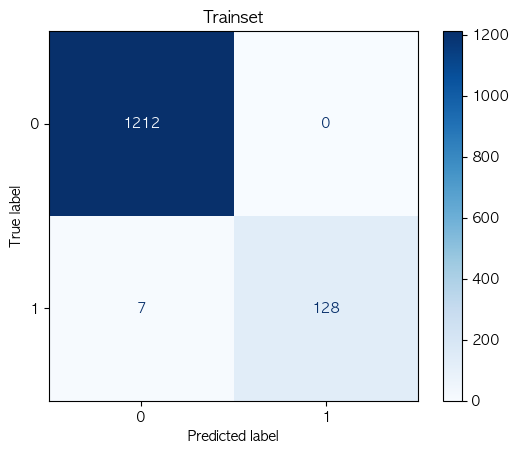

In [61]:
plot_confusion_matrix(y_train, pred_train_rfc, "Trainset")

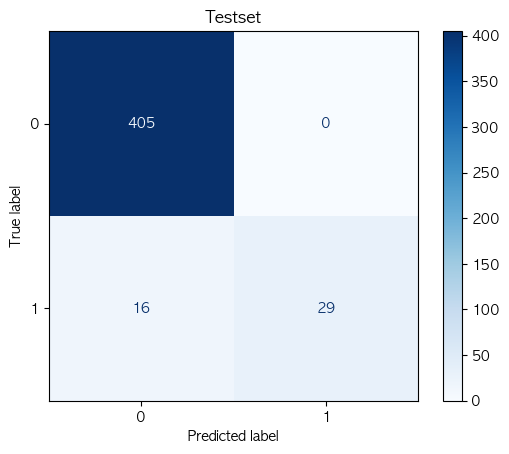

In [62]:
plot_confusion_matrix(y_test, pred_test_rfc, "Testset")

## 재현율과 정밀도의 관계

**분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## 결과 후처리를 이용해 재현율 또는 정밀도 성능 올리기

- Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도를 올릴 수 있다.
- **결과 후처리시 임계값(Threshold) 변경**
    - 분류 모델은 입력값에 대해 class별 확률을 예측 한다. 그 출력된 확률값이 높은 class를 정답 class로 처리한다. 
    - **이진 분류**의 경우 모델은 양성(Positive)일 확률을 출력한다. 
    - **결과 후처리**
        - 이진 분류 모델이 출력한 양성일 확률에서 양성과 음성을 나누는 임계값(Threshold)을 정하고 그 임계값 이하일 경우 음성, 초과일 경우 양성으로 class를 정한다. 이 작업은 결과 후처리에서 진행한다.
        - 그 임계값을 무엇으로 하느냐에 따라 재현율과 정밀도가 변경된다. (기본: 0.5)
    - 모델의 재현율이나 정밀도 성능을 높이기 위해 **후처리 작업에서 사용하는 임계값(threshold)를 변경한다.**
        - 단 임계값(threshold)를 변경해서 하나의 성능을 올라가면 다른 하나는 떨어진다. 즉 **재현율과 정밀도의 임계값 변경에 따른 성능변화는 반비례한다.**
        - 그래서 극단적으로 임계점을 변경해서 한쪽의 점수를 높이면 안된다.
            - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.

![image.png](images/thresh.png)

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [65]:
# threshold를 통해 0과 1 중 정답치의 기준값을 조절
#   - 0.5보다 작게 설정: 0과 가깝지 않으면 0이라고 하지 않음
#   - 0.5보다 크게 설정: 1과 가깝지 않으면 1이라고 하지 않음
# 위양성율 : ex) 1이라고 예측했을 때 1이 아닌 경우의 확률
# 재현율 : ex) 1이라고 예측했을 때 진짜 1이 맞을 확률
# 재현율 높이려면 정밀도와 위양성율, 임계값을 낮춰야 함

In [67]:
# class 별 확률 조회
pred_tree_proba = tree.predict_proba(X_test)# [[0일확률, 1일확률]]
print(pred_tree_proba[:5])
# print(tree.predict(X_test)[:5])  # 정답 클래스
pred_tree_proba.shape
#1(양성) 일 확률만 조회
pred_tree_pos_proba  = pred_tree_proba[:, 1]    
print(pred_tree_pos_proba[:5])

# # 임계값 변경 (양성/음성을 나누는 기준이 되는 확률값.) ==> 0.1
thresh = 0.1
pred_test_tree2 =  np.where(pred_tree_pos_proba >= thresh, 1, 0)
print(pred_test_tree2[:15])

[[0.99173554 0.00826446]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]]
[0.00826446 0.01304348 0.01304348 0.01304348 0.01304348]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [68]:
print_binary_classification_metrics(y_test, pred_test_tree, "임계값: 0.5")

임계값: 0.5
정확도: 0.9511111111111111
재현율: 0.7555555555555555
정밀도: 0.7555555555555555
F1 점수: 0.7555555555555555


In [69]:
print_binary_classification_metrics(y_test, pred_test_tree2, f"임계값: {thresh}")

임계값: 0.1
정확도: 0.9177777777777778
재현율: 0.8222222222222222
정밀도: 0.5606060606060606
F1 점수: 0.6666666666666666


##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [71]:
# decision tree 모델, test set기준
from sklearn.metrics import precision_recall_curve

pos_proba_test = tree.predict_proba(X_test)[:, 1]   # 모델이 추정한 양성일 확률
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test) # (정답, 양성일 **확률**)
# 정밀도, 재현율이 변경되는 임계값들
print(precisions.shape, recalls.shape, thresholds.shape)


thresholds = np.append(thresholds, 1)   # 임계값이 항상 1개가 모자라서 채움 / 임계값을 1이상으로 준다면 다 0으로 예측하므로 기본적으로 생략되기 때문
print(precisions.shape, recalls.shape, thresholds.shape)

(8,) (8,) (7,)
(8,) (8,) (8,)


In [72]:
precisions

array([0.1       , 0.10757946, 0.43181818, 0.51388889, 0.56060606,
       0.75555556, 0.82352941, 1.        ])

In [73]:
recalls

array([1.        , 0.97777778, 0.84444444, 0.82222222, 0.82222222,
       0.75555556, 0.62222222, 0.        ])

In [74]:
thresholds

array([0.00826446, 0.01304348, 0.03389831, 0.04      , 0.14925373,
       0.54545455, 0.75      , 1.        ])

In [75]:
import pandas as pd
prc_df = pd.DataFrame({
    "threshold":thresholds,
    "recall": recalls,
    "precision": precisions
})
prc_df.set_index('threshold', inplace=True)
prc_df
# threshold가 커지면 precision이 올라가고 recall은 떨어진다.
# threshold가 작아지면 recall이 올라가고 precision은 떨어진다.

,recall,precision
threshold,,
0.008264,1.000000,0.100000
0.013043,0.977778,0.107579
0.033898,0.844444,0.431818
0.040000,0.822222,0.513889
0.149254,0.822222,0.560606
0.545455,0.755556,0.755556
0.750000,0.622222,0.823529
1.000000,0.000000,1.000000


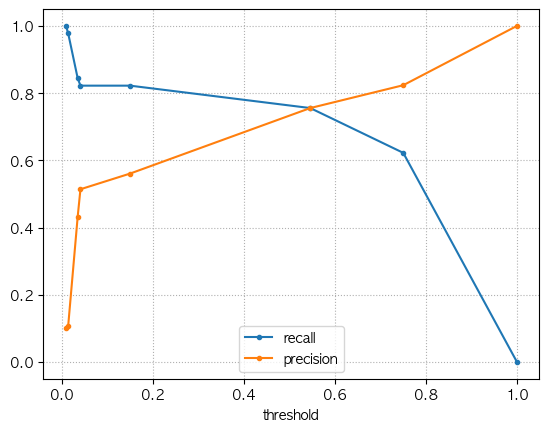

In [78]:
prc_df.plot(marker='.');
plt.grid(True, linestyle=":") # 배경 선 설정
# 임계값이 0.545455일 때 재현율과 정밀도가 동일해지는 것 확인 가능

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 이진분류의 평가지표. 
- Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율과 정밀도의 변화를 이용해 모델의 성능을 평가한다. 
    - 재현율이 변화할 때 정밀도가 어떻게 변화하는지 평가한다.
- Precision과 Recall 값들을 이용해 모델을 평가하는 것으로 모델의 Positive에 대한 성능의 강건함(robust)를 평가한다.
- **X축에 재현율, Y축에 정밀도를** 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
  
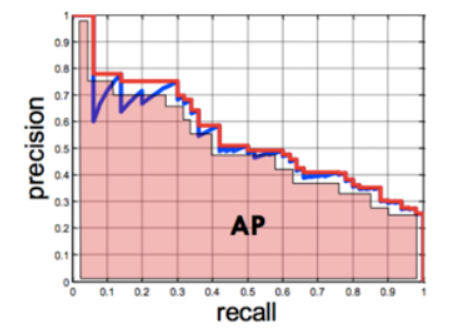   

In [80]:
# 선아래 면적이 넓을수록 양성에 있어서 강건한 모델 / 성능이 우수
# 양성에 대한 확률을 측정하고 싶을 경우(양성이 중심인 경우) 확인 가능

In [81]:
##### DecisionTree의 PrecisionRecall 커브 그리기 + AP Score 계산.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# 모델이 추정한 positive 확률을 조회
test_proba_tree = tree.predict_proba(X_test)[:, 1]
test_proba_rfc = rfc.predict_proba(X_test)[:, 1]

In [82]:
### ap score 로 모델을 평가 / average_precision_score를 통해 계산
tree_ap = average_precision_score(y_test, test_proba_tree)  # (y정답, 모델이 예측한 양성일 확률)
rfc_ap = average_precision_score(y_test, test_proba_rfc)
print("DecisionTree Average Precision Score:", tree_ap)
print("RandomForest Average Precision Score:", rfc_ap)

DecisionTree Average Precision Score: 0.6766948888666132
RandomForest Average Precision Score: 0.9447985949911246


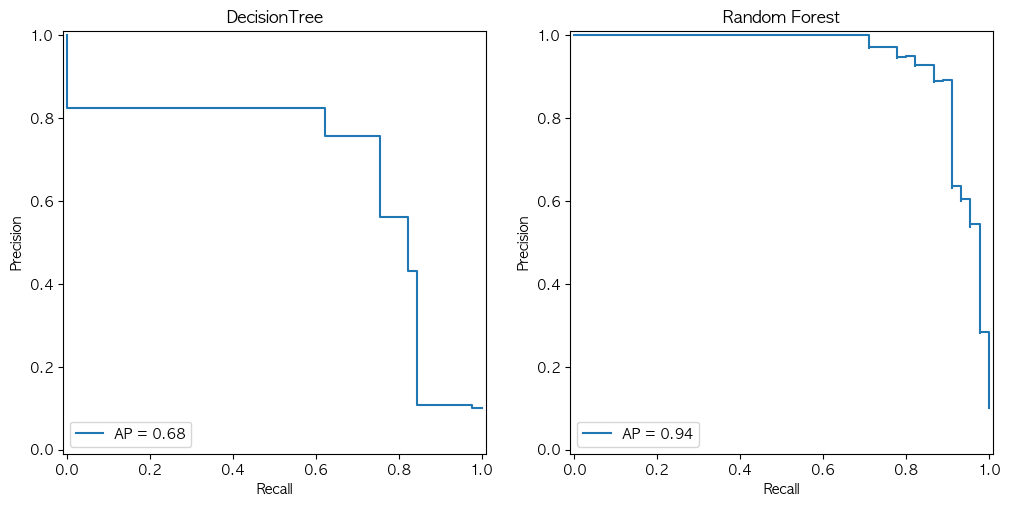

In [83]:
### 시각화
precisions1, recalls1, _ = precision_recall_curve(y_test, test_proba_tree)   # x,y축만 확인하면 되니 임계값은 _ 로 표시
precisions2, recalls2, _ = precision_recall_curve(y_test, test_proba_rfc)

### 하나의 Figure 두개 subplot으로 그리기. / 한번에 보기 위함
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1) # DecisionTree
ax2 = fig.add_subplot(1, 2, 2) # RandomForest

disp_tree = PrecisionRecallDisplay(  #PrecisionRecall Curve를 시각화하는 클스스
    precisions1, # precision값들
    recalls1,    # recall값들
    average_precision=tree_ap  # AP score
)
disp_tree.plot(ax=ax1) # 시각화

disp_rfc = PrecisionRecallDisplay(precisions2, recalls2, average_precision=rfc_ap)
disp_rfc.plot(ax=ax2)

ax1.set_title("DecisionTree")
ax2.set_title("Random Forest")
plt.show()

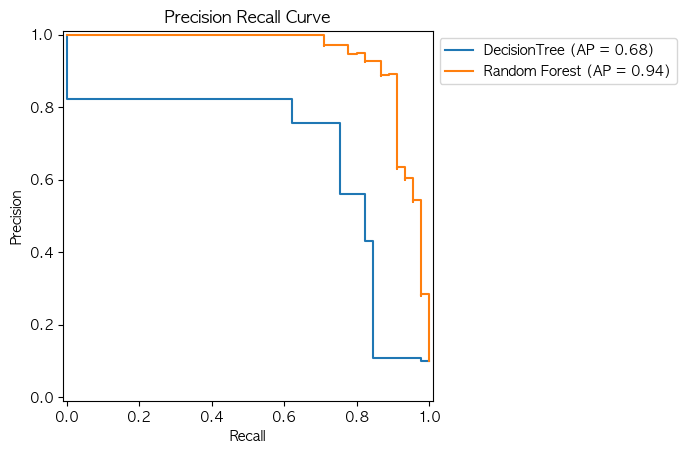

In [84]:
### 하나의 subplot에 같이 그리기.

precisions1, recalls1, _ = precision_recall_curve(y_test, test_proba_tree)
precisions2, recalls2, _ = precision_recall_curve(y_test, test_proba_rfc)

ax = plt.gca()

disp_tree = PrecisionRecallDisplay(
    precisions1, 
    recalls1, 
    average_precision=tree_ap, 
    estimator_name="DecisionTree" # label 지정
)

disp_tree.plot(ax=ax)

disp_rfc = PrecisionRecallDisplay(
    precisions2, 
    recalls2, 
    average_precision=rfc_ap, 
    estimator_name="Random Forest"
)
disp_rfc.plot(ax=ax)

plt.title("Precision Recall Curve")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    - 낮을 수록 좋다.
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    - 높을 수록 좋다.
    $$
    \frac{TP}{FN+TP}
    $$
- Positive의 임계값을 변경할 경우 **FPR과 TPR(recall)은 비례해서 변화한다.**
- <b style='font-size:1.3em'>ROC Curve</b>
    - 이진 분류의 성능 평가 지표
    - Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율(TPR)과 위양성율(FPR)의 변화를 이용해 모델의 성능을 평가한다.
        - FPR 변화할 때 TPR이 어떻게 변하는 지를 평가한다.
    - FPR을 X축, TPR을 Y축으로 놓고  놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
    - Positive(양성), Negative(음성) 에 대한 모델의 성능의 강건함(robust)을 평가한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

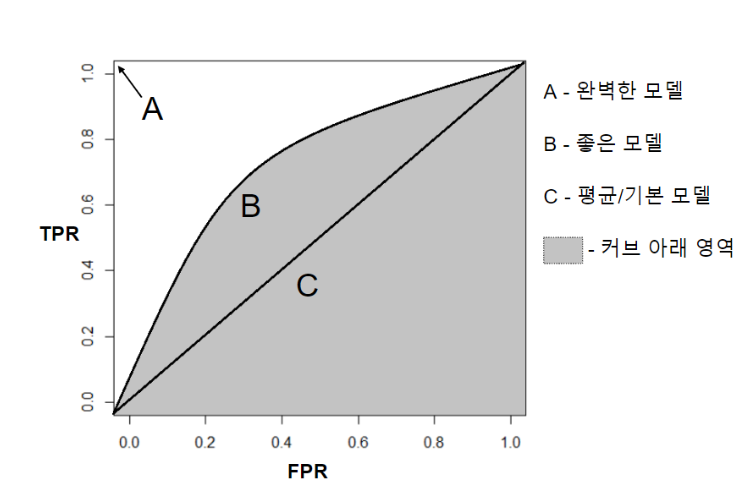

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

### ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [85]:
# 재현율이 높고 위양성율이 낮을수록 좋음 -> 재현율(y축), 위양성율(x축) -> 왼쪽 위 good

In [86]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

#### roc-auc score 계산
tree_roc = roc_auc_score(y_test, test_proba_tree)   # 정답 / 모델이 예측한 양성일 확률
rfc_roc =roc_auc_score(y_test, test_proba_rfc)

print("Tree:", tree_roc)
print("RFC:", rfc_roc)

Tree: 0.8975308641975308
RFC: 0.9876543209876543


In [88]:
import pandas as pd
# threshold 변화에 따른 recall, fpr 값의 변화를 조회
fpr1, recall1, thresh1 = roc_curve(y_test, test_proba_tree)
fpr2, recall2, thresh2 = roc_curve(y_test, test_proba_rfc)

print(fpr1.shape, recall1.shape, thresh1.shape)

df = pd.DataFrame({
    "Thresh": thresh1,
    "FPR":fpr1,
    "Recall":recall1
})
df

(8,) (8,) (8,)


,Thresh,FPR,Recall
0,inf,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


<Axes: xlabel='Thresh'>

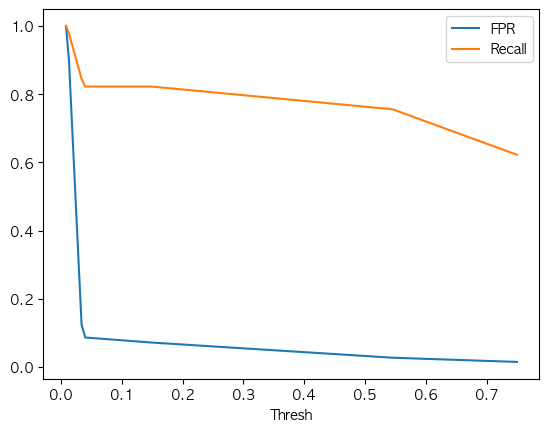

In [90]:
df.set_index("Thresh").plot()

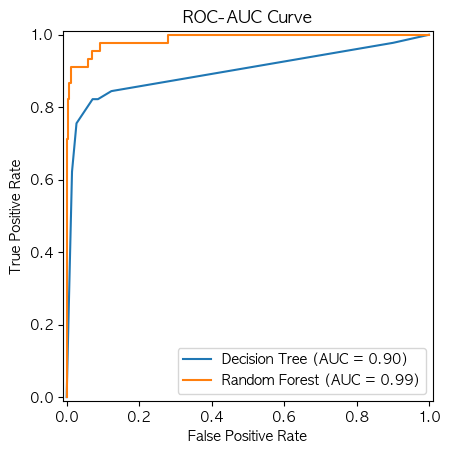

In [91]:
# 시각화

ax = plt.gca()
ax.set_title("ROC-AUC Curve")
disp_roc_tree = RocCurveDisplay(
    fpr=fpr1, tpr=recall1,
    roc_auc=tree_roc,   # roc-auc score
    estimator_name="Decision Tree"
) 
disp_roc_tree.plot(ax=ax)

disp_roc_rfc = RocCurveDisplay(
    fpr=fpr2, tpr=recall2,
    roc_auc=rfc_roc,
    estimator_name="Random Forest"
)
disp_roc_rfc.plot(ax=ax)

plt.show()

In [ ]:
# %load metrics.py

In [92]:
%%writefile metrics.py

###### 평가 모듈 -> 다양한 평가지표들을 계산/출력하는 함수들가지는 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve)

__version__ = 1.1

def plot_precision_recall_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """Precision Recall Curve 시각화 함수
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:"""
    # ap score 계산
    ap_score = average_precision_score(y_proba, pred_proba)
    # thresh 변화에 따른 precision, recall 값들 계산.
    precision, recall, _ = precision_recall_curve(y_proba, pred_proba)
    # 시각화
    disp = PrecisionRecallDisplay(
        precision, recall, 
        average_precision=ap_score,  
        estimator_name=estimator_name
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()
    
def plot_roc_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """ROC Curve 시각화
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:
    """
    ## ROC-AUC score 계산
    auc_score = roc_auc_score(y_proba, pred_proba)
    ## Thresh 변화에 따른 TPR(Recall) 과 FPR(위양성율) 계산
    fpr, tpr, _ = roc_curve(y_proba, pred_proba)
    ### 시각화
    disp = RocCurveDisplay(
        fpr=fpr, tpr=tpr, 
        estimator_name=estimator_name,
        roc_auc=auc_score
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()

def plot_confusion_matrix(y, pred, title=None):
    """Confusion matrix 시각화 함수
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 출력할 제목. default=None
    Returns:
    Raises:
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()

def print_binary_classification_metrics(y, pred, proba=None, title=None):
    """정확도, 재현율, 정밀도, f1 점수를 계산해서 출력하는 함수
    만약 모델이 추정한 양성의 확률을 전달 받은 경우 average_precision과  roc-auc score도 출력
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        proba: ndarray - 모델이 추정한 양성일 확률값. Default: None
        title: str - 결과에 대한 제목 default=None
    Returns:
    Raises:
    """
    if title:
        print(title)
    print("정확도:", accuracy_score(y, pred))
    print("재현율:", recall_score(y, pred))
    print("정밀도:", precision_score(y, pred))
    print("F1 점수:", f1_score(y, pred))
    if proba is not None:
        print("Average Precision:", average_precision_score(y, proba))
        print("ROC-AUC Score:", roc_auc_score(y, proba))


Overwriting metrics.py


In [93]:
# metrics.py 다시 inmport 시 덮어쓰기 한번 했기 때문에 재시작 해야 실행

## TODO: breast_cancer data 모델링

1. breast cancer data 로딩 
1. train/test set으로 분리
1. 모델링 RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [98]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']
X.shape, y.shape

((569, 30), (569,))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.2, random_state=0
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [101]:
rfc_dst = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=0)
rfc_dst

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [105]:
# 학습
rfc_dst.fit(X_train, y_train)

# 추론
pred_train_rfc1 = rfc_dst.predict(X_train)
pred_test_rfc1 =  rfc_dst.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train_rfc1), accuracy_score(y_test, pred_test_rfc1)

(0.9604395604395605, 0.9649122807017544)

In [108]:
from sklearn.metrics import recall_score
recall_score(y_train, pred_train_rfc1), recall_score(y_test, pred_test_rfc1)

(0.9827586206896551, 0.9701492537313433)

In [109]:
from sklearn.metrics import precision_score
precision_score(y_train, pred_train_rfc1), precision_score(y_test, pred_test_rfc1)

(0.9563758389261745, 0.9701492537313433)

In [110]:
from sklearn.metrics import f1_score
f1_score(y_train, pred_train_rfc1), f1_score(y_test, pred_test_rfc1)

(0.9693877551020408, 0.9701492537313433)

[[45  2]
 [ 2 65]]


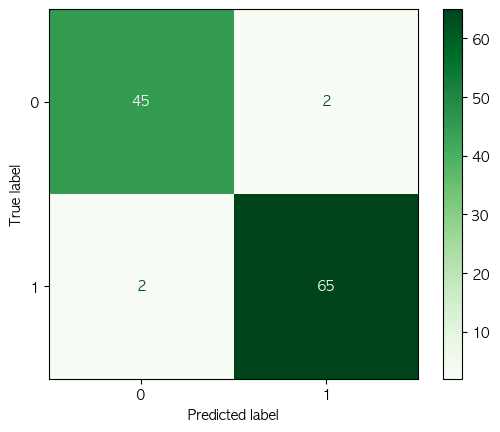

In [115]:
cm_dst = confusion_matrix(y_test, pred_test_rfc1)
print(cm_dst)

disp_dst = ConfusionMatrixDisplay(cm_dst)
disp_dst.plot(cmap="Greens")

# 회귀(Regression) 평가지표

예측할 값(Target)이 연속형(continuous) 데이터인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
      
\begin{align}
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
y_i: 실제값, \hat{y_i}: 모델이 예측한 값
\end{align}    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다. MSE의 제곱근을 계산한 평가지표가 RMSE이다.
    - `root_mean_squared_error()` 함수 1.4 버전에서 추가됨.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$
   

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$
<center>
$y_i$: i번째 정답 값,   
$\hat{y_i}$: i 번째 예측 값,   
$\bar{y}$: y의 평균      
</center>

## 예제

> #### Dataset 생성 함수
> - make_xxxxx() 함수
>     - 머신러닝 학습을 위한 dummy dataset 구현 함수
>     - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
> - make_regression(): 회귀 문제를 위한 dummy dataset 생성
> - make_classification(): 분류 문제를 위한 dummy dataset 생성

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

In [ ]:
## scikit-learn 제공 데이터셋 종류
# load_xxxxx : 실제 데이터셋. scikit-learn 설치시 같이 데이터파일 저장.
# fetch_xxxx : 실제 데이터셋. 처음 함수가 호출될 때 데이터파일을 다운로드.
# make_xxxxx : 가짜 데이터셋을 생성하는 함수. 우리가 원하는 값들을 가지는 데이터를 생성할 때 사용.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression  # 회귀문제용 데이터셋을 생성하는 함수

In [ ]:
X, y = make_regression(
     n_samples=1000,     # 총데이터개수(Data point)
     n_features=1,       # feature의 개수(컬럼수)
     n_informative=1,    # y(Label)에 영향을 주는 feature의 개수. n_features보다 크며 안됨.
     noise=30,           # 모델이 찾을 수 없는 값의 범위. 0 ~ noise 사이 랜덤한 실수 값이 noise로 설정됨.==> 인정할 수 있는 오차 범위.
     random_state=0
)
X.shape, y.shape

In [ ]:
X[:5]

In [ ]:
y[:5]

In [ ]:
###  X, y 관계를 시각화 (둘다 연속성(수치형) - 산점도, 점수: 상관계수)
plt.scatter(X.flatten(), y, alpha=0.5)
plt.show()

In [ ]:
# 상관계수  -1 ~ 1 (음수: 반비례, 양수: 비례). 1에 가까울수록 관계가 크다. 
np.corrcoef([X.flatten(), y])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # 직선의 방정식을 이용한 모델.
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

In [ ]:
# 모델링
lr = LinearRegression()
tree = DecisionTreeRegressor(max_depth=3, random_state=0)

#  학습
lr.fit(X_train, y_train)
tree.fit(X_train, y_train)

In [ ]:
# 평가
## 추정 -> 회귀모델은 predict()로 추정. predict_proba()는 없다.(분류)
pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

In [ ]:
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
# 회귀 평가 - 평가함수(정답, 모델추정값)
print("LinearRegression  평가")
print("MSE:", mean_squared_error(y_train, pred_train_lr), mean_squared_error(y_test, pred_test_lr), sep=" , ")
print("RMSE:", root_mean_squared_error(y_train, pred_train_lr), root_mean_squared_error(y_test, pred_test_lr), sep=" , ")
print("R square(결정계수):", r2_score(y_train, pred_train_lr), r2_score(y_test, pred_test_lr), sep=" , ")

In [ ]:
print("Decision Tree 평가 결과")
print("MSE:", mean_squared_error(y_train, pred_train_tree), mean_squared_error(y_test, pred_test_tree), sep=" , ")
print("RMSE:", root_mean_squared_error(y_train, pred_train_tree), root_mean_squared_error(y_test, pred_test_tree), sep=" , ")
print("R square(결정계수):", r2_score(y_train, pred_train_tree), r2_score(y_test, pred_test_tree), sep=" , ")

In [ ]:
np.linspace(-3.2, 3.2, 1000).reshape(-1, 1).shape

In [ ]:
#############################################################
# LinearRegression, DecisionTree 모델이 추청한 결과를 시각화.
#############################################################
## 입력값을 생성
new_X = np.linspace(-3.2, 3.2, 1000).reshape(-1, 1)
new_y_lr = lr.predict(new_X)
new_y_tree = tree.predict(new_X)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.3)
plt.plot(new_X.flatten(), new_y_lr, label="LinearRegression", color="red", linewidth=3)
plt.plot(new_X.flatten(), new_y_tree, label="DecisionTree", color="greenyellow", linewidth=3)
plt.legend()
plt.show()

In [ ]:
%%writefile metrics.py

###### 평가 모듈 -> 다양한 평가지표들을 계산/출력하는 함수들가지는 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)

__version__ = 1.2

def plot_precision_recall_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """Precision Recall Curve 시각화 함수
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:"""
    # ap score 계산
    ap_score = average_precision_score(y_proba, pred_proba)
    # thresh 변화에 따른 precision, recall 값들 계산.
    precision, recall, _ = precision_recall_curve(y_proba, pred_proba)
    # 시각화
    disp = PrecisionRecallDisplay(
        precision, recall, 
        average_precision=ap_score,  
        estimator_name=estimator_name
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()
    
def plot_roc_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """ROC Curve 시각화
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:"""
    ## ROC-AUC score 계산
    auc_score = roc_auc_score(y_proba, pred_proba)
    ## Thresh 변화에 따른 TPR(Recall) 과 FPR(위양성율) 계산
    fpr, tpr, _ = roc_curve(y_proba, pred_proba)
    ### 시각화
    disp = RocCurveDisplay(
        fpr=fpr, tpr=tpr, 
        estimator_name=estimator_name,
        roc_auc=auc_score
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()

def plot_confusion_matrix(y, pred, title=None):
    """Confusion matrix 시각화 함수
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 출력할 제목. default=None
    Returns:
    Raises::
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()

def print_binary_classification_metrics(y, pred, proba=None, title=None):
    """정확도, 재현율, 정밀도, f1 점수를 계산해서 출력하는 함수
    만약 모델이 추정한 양성의 확률을 전달 받은 경우 average_precision과  roc-auc score도 출력
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        proba: ndarray - 모델이 추정한 양성일 확률값. Default: None
        title: str - 결과에 대한 제목 default=None
    Return
    Exception
    """
    if title:
        print(title)
    print("정확도:", accuracy_score(y, pred))
    print("재현율:", recall_score(y, pred))
    print("정밀도:", precision_score(y, pred))
    print("F1 점수:", f1_score(y, pred))
    if proba is not None:
        print("Average Precision:", average_precision_score(y, proba))
        print("ROC-AUC Score:", roc_auc_score(y, proba))

def print_regression_metrcis(y, pred, title=None):
    """회귀 평가지표를 출력하는 함수
    Args:
        y: ndarray - 정답 
        pred: ndarray - 모델 추정값
        title: 결과에 대한 제목. default: None
    Returns:
    Raises:"""
    if title:
        print(title)
    print("MSE:", mean_squared_error(y, pred))
    print("RMSE:", root_mean_squared_error(y, pred))
    print("R Squared:", r2_score(y, pred))